# LIWC Test
*(Always to be run as sets up important env)*

In [92]:
# Set the Reddit Data File Path (JSON)
data_file_path = "data/California_comments.json"

time_interval_seconds = 2 * 30 * 24 * 60 * 60 # two months
time_start = 1546300801 # 1st January 2019
time_end = 1672531201 # 1st January 2023

activity_bucket_limits = [1, 10, 100, 1000, 10000, 100000, 1000000] # Inclusive on lower bound, exclusive on upper bound - strictly integers

In [59]:
!sed -i -e '/[<(]/d' dictionaries/LIWC07-EN.dic

In [60]:
import liwc
parse, category_names = liwc.load_token_parser('dictionaries/LIWC07-EN.dic')

In [61]:
import re
from collections import Counter

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

def count_categories(text):
    # Returns a Counter object containing tallies of all LIWC categories
    text = text.lower()
    tokens = tokenize(text)
    counter = Counter(category for token in tokens for category in parse(token))

    # If a category doesn't exist in the text, we need to add it and set the count to 0
    for category in category_names:
        if category not in counter:
            counter[category] = 0

    return counter

gettysburg = "Hello"

print(count_categories(gettysburg))
#=> Counter({'funct': 58, 'pronoun': 18, 'cogmech': 17, ...})

Counter({'social': 1, 'funct': 0, 'pronoun': 0, 'ppron': 0, 'i': 0, 'we': 0, 'you': 0, 'shehe': 0, 'they': 0, 'ipron': 0, 'article': 0, 'verb': 0, 'auxverb': 0, 'past': 0, 'present': 0, 'future': 0, 'adverb': 0, 'preps': 0, 'conj': 0, 'negate': 0, 'quant': 0, 'number': 0, 'swear': 0, 'family': 0, 'friend': 0, 'humans': 0, 'affect': 0, 'posemo': 0, 'negemo': 0, 'anx': 0, 'anger': 0, 'sad': 0, 'cogmech': 0, 'insight': 0, 'cause': 0, 'discrep': 0, 'tentat': 0, 'certain': 0, 'inhib': 0, 'incl': 0, 'excl': 0, 'percept': 0, 'see': 0, 'hear': 0, 'feel': 0, 'bio': 0, 'body': 0, 'health': 0, 'sexual': 0, 'ingest': 0, 'relativ': 0, 'motion': 0, 'space': 0, 'time': 0, 'work': 0, 'achieve': 0, 'leisure': 0, 'home': 0, 'money': 0, 'relig': 0, 'death': 0, 'assent': 0, 'nonfl': 0, 'filler': 0})


## Determine User Buckets

In [62]:
import tqdm
import pandas as pd
import json
import os


# Group the users into buckets based on activity during each time interval
# Create a list of dictionaries the following format: (the index in the list is the time bucket index)
# [{user_id: posts_during_time_interval, user_id: posts_during_time_interval, ...}, 
#  {user_id: posts_during_time_interval, user_id: posts_during_time_interval, ...}, ...]

# Initialise a list of empty dictionaries of the amount of time intervals
activity_buckets = [{} for i in range(int((time_end - time_start) / time_interval_seconds) + 1)]

# Initialise progress bar
pbar = tqdm.tqdm(total=os.path.getsize(data_file_path))

# Iterate through the data file
with open(data_file_path) as data_file:
    # Analyse each line in the data file
    for line in data_file:
        # Load the line as a JSON object
        line_json = json.loads(line)
        
        # Get the timestamp of the comment
        timestamp = int(line_json["created_utc"])
        user_id = line_json["author"]

        # Check if within start and end time
        if timestamp < time_start or timestamp > time_end:
            # Update the progress bar
            pbar.update(len(line))
            continue
        
        # Get the time interval index
        time_interval_index = int((timestamp - time_start) / time_interval_seconds)

        # Check if the user has already been added to the activity bucket
        if user_id in activity_buckets[time_interval_index]:
            # Increment the user's post count
            activity_buckets[time_interval_index][user_id] += 1
        else:
            # Add the user to the activity bucket
            activity_buckets[time_interval_index][user_id] = 1

        # Update the progress bar
        pbar.update(len(line))

# Close the progress bar
pbar.close()

# Initialise another progress bar
pbar = tqdm.tqdm(total=len(activity_buckets))

# Change the activity count into bucket indices
for time_bucket in activity_buckets:
    # Update the progress bar
    pbar.update(1)
    for user in time_bucket:
        # Iterate through the activity bucket limits
        for i in range(len(activity_bucket_limits)):
            # Using the activity bucket limits, find the bucket index
            if time_bucket[user] >= activity_bucket_limits[i] and time_bucket[user] < activity_bucket_limits[i + 1]:
                # Set the activity bucket to the bucket index
                time_bucket[user] = i
                break


# Close the progress bar
pbar.close()

activity_buckets

100%|██████████| 25/25 [00:00<00:00, 226.49it/s]


[{'[deleted]': 3,
  'ghoulianna': 0,
  'frozzbot27': 0,
  'MCPtz': 0,
  'AutoModerator': 2,
  'uwgrad627': 0,
  'BlankVerse': 2,
  'ShotgunMage': 1,
  'Teen_Grandma': 1,
  'Tichy500': 0,
  'mechanizzm': 0,
  'RandomGerman': 0,
  'david220403': 0,
  '1320Fastback': 1,
  'tekno45': 0,
  'WYUYBDAAHNFIAGT': 0,
  'aburrido': 0,
  'lolwutpear': 0,
  'brikes': 0,
  'seacookie89': 1,
  'BlurryEcho': 0,
  'Raibean': 1,
  'avocadonumber': 0,
  'NorCalK': 0,
  'SinecureLife': 0,
  'NukaWax': 0,
  'nosotros_road_sodium': 0,
  'Ennion': 1,
  'slolift': 0,
  'yourbrofessor': 0,
  'tridentgum': 0,
  'sleepytimegirl': 0,
  'caraway90': 0,
  'eugenesbluegenes': 0,
  'amblyopicsniper': 1,
  'spoonybard326': 0,
  'Grillpower69': 0,
  'Oreganoian': 0,
  'throwaway_ghast': 0,
  'Atreides_cat': 0,
  'Patapon646': 0,
  'tvssurfer': 0,
  'meddling_robot': 1,
  'MaikaiMaikai': 0,
  'wiggitywak': 0,
  'Boredstateworker': 1,
  'newtryboys': 0,
  'EnpySee': 0,
  'swivellocker': 0,
  'Zaggie': 0,
  'rustyseapants'

## Create CSV

In [63]:
run_CSV_creation = True

if run_CSV_creation:
    # Intialise the progress bar based on the number of items in the data file
    with open(data_file_path) as f:
        num_lines = sum(1 for line in f)

    pbar = tqdm.tqdm(total=num_lines)

    # Read the data file and add the data to the csv file
    with open(data_file_path) as f:
        with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC.csv', 'w') as csv_file:

            # Clear the csv file of any existing data
            csv_file.truncate(0)

            for line in f:
                LIWC_by_bucket = json.loads(line)
                utc_timestamp = LIWC_by_bucket['created_utc']
                LIWC_categories = count_categories(LIWC_by_bucket['body'])
                author = LIWC_by_bucket['author']

                # Check if post is within the time interval
                if int(utc_timestamp) < time_start or int(utc_timestamp) > time_end:
                    pbar.update(1)
                    continue

                # Determine the activity bucket index
                time_interval_index = int((int(utc_timestamp) - time_start) / time_interval_seconds)
                activity_buckets_index = activity_buckets[time_interval_index][author]

                # Write the data to the csv file
                csv_file.write(f'{utc_timestamp},"{LIWC_categories}", {activity_buckets_index}\n')

                # Update the progress bar
                pbar.update(1)
            

    # Close the progress bar
    pbar.close()


100%|██████████| 858926/858926 [04:02<00:00, 3537.35it/s]


In [64]:
# Load the data from the csv file into a dataframe
df = pd.read_csv(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC.csv')

# Add headers to the dataframe
df.columns = ['utc_timestamp', 'LIWC_categories', 'activity_bucket_index']

df.head()

,utc_timestamp,LIWC_categories,activity_bucket_index
0,1546301397,"Counter({'funct': 35, 'relativ': 13, 'preps': ...",0
1,1546301720,"Counter({'funct': 34, 'relativ': 11, 'pronoun'...",0
2,1546302474,"Counter({'funct': 18, 'preps': 6, 'cogmech': 6...",0
3,1546303178,"Counter({'funct': 81, 'cogmech': 34, 'article'...",2
4,1546303237,"Counter({'funct': 17, 'preps': 5, 'pronoun': 4...",0


In [65]:
import numpy as np

# Calculate time bucket intervals
time_buckets = range(int(time_start), int(time_end) + int(time_interval_seconds), int(time_interval_seconds))

# Print maximum utc_timestamp
# print(df['utc_timestamp'].max())
# print("------------------")
# print(*time_buckets, sep='\n')


# Change the utc_timestamp to the bucket number, e.g. the 0th bucket is between the 0th index and the 1st index of the time_buckets
df['utc_timestamp'] = df['utc_timestamp'].apply(lambda x: np.searchsorted(time_buckets, x) - 1)


df.head()

,utc_timestamp,LIWC_categories,activity_bucket_index
0,0,"Counter({'funct': 35, 'relativ': 13, 'preps': ...",0
1,0,"Counter({'funct': 34, 'relativ': 11, 'pronoun'...",0
2,0,"Counter({'funct': 18, 'preps': 6, 'cogmech': 6...",0
3,0,"Counter({'funct': 81, 'cogmech': 34, 'article'...",2
4,0,"Counter({'funct': 17, 'preps': 5, 'pronoun': 4...",0


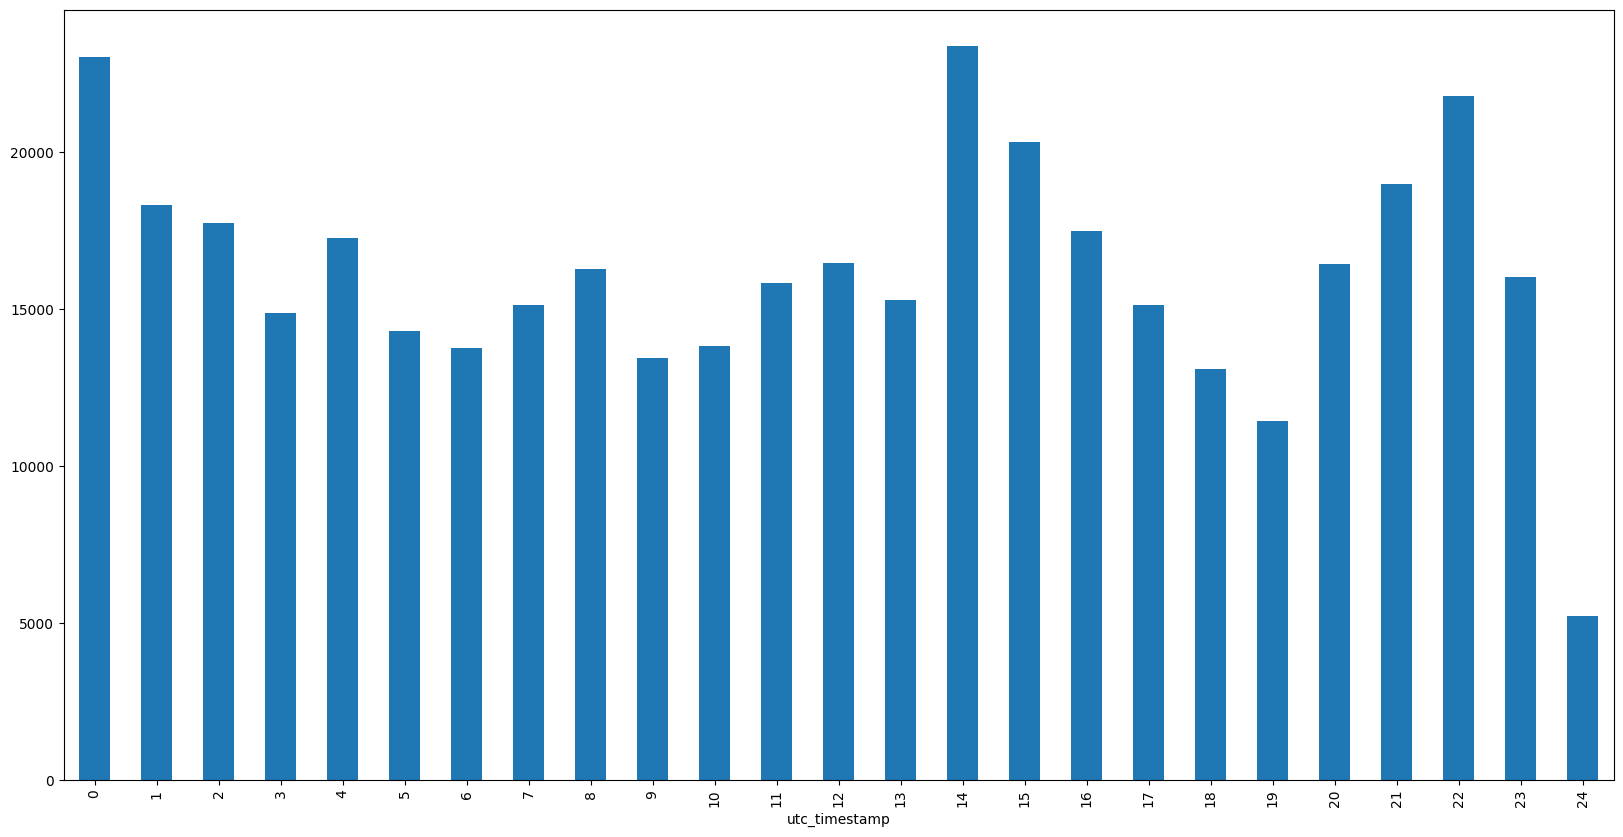

In [66]:
# Graph the number of comments per time bucket
import matplotlib.pyplot as plt

# Delete all rows with a utc_timestamp of -1
df = df[df['utc_timestamp'] != -1]

df['utc_timestamp'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
plt.show()

In [67]:
# The LIWC categories stored in a list
data = [
    'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
    'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future',
    'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear',
    'social', 'family', 'friend', 'humans', 'affect', 'posemo',
    'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause',
    'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept',
    'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest',
    'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure',
    'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler'
]

# Construct a dictionary with the value in the form of a nested list, and the key as the LIWC category
# where the outer index is the activity_bucket_index, and the inner index is the time_bucket_index
# {LIWC_category: [[time_bucket_0, time_bucket_1, ...], [time_bucket_0, time_bucket_1, ...], ...]}

# Initialise the dictionary
LIWC_category_dict = {}

# Initialise the dictionary with empty nested lists
LIWC_category_dict = {category: [[0 for _ in time_buckets] for _ in activity_bucket_limits] for category in data}

print(LIWC_category_dict)

# Start a progress bar
pbar = tqdm.tqdm(total=len(df))

# Iterate through each entry in df and aggregate the LIWC categories for each time_bucket
for index, row in df.iterrows():
    # Get the time_bucket and LIWC_categories
    time_bucket = row['utc_timestamp']
    LIWC_categories = row['LIWC_categories']
    activity_bucket_index = row['activity_bucket_index']

    # Convert the LIWC_categories string to a dictionary
    LIWC_categories = eval(LIWC_categories)

    # For each row, go through the LIWC categories and add the time_bucket to the correct list
    for category in LIWC_categories:
        LIWC_category_dict[category][activity_bucket_index][time_bucket] += (LIWC_categories[category])

    # Update the progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

LIWC_category_dict

{'funct': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'pronoun': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

100%|██████████| 404727/404727 [04:20<00:00, 1553.11it/s]


{'funct': [[153971,
   138237,
   115242,
   107992,
   116008,
   94744,
   99304,
   123753,
   117320,
   107665,
   104636,
   114335,
   129000,
   110616,
   152742,
   130421,
   117746,
   108359,
   97766,
   89735,
   125491,
   128296,
   151962,
   125874,
   47870,
   0],
  [143863,
   115332,
   122994,
   80285,
   106926,
   81731,
   83811,
   57435,
   62263,
   32331,
   40789,
   67512,
   76374,
   61483,
   121747,
   86224,
   74172,
   61996,
   49032,
   40242,
   63154,
   90601,
   98090,
   56566,
   4440,
   0],
  [71353,
   60357,
   46469,
   27564,
   47731,
   53220,
   46740,
   34453,
   50521,
   44997,
   50265,
   11418,
   10664,
   17121,
   29503,
   13215,
   8455,
   7399,
   7080,
   7946,
   12265,
   0,
   8415,
   7219,
   2209,
   0],
  [3733,
   1670,
   5443,
   4236,
   8863,
   2394,
   4066,
   3806,
   4481,
   4458,
   4952,
   7552,
   4644,
   5626,
   5506,
   7324,
   4982,
   2781,
   2684,
   2854,
   2676,
   11978,
   11249

In [68]:
# Normalise the data by dividing each value by the total number of LIWC detected words in that activity and time bucket

# Get the sum of all the LIWC categories for each activity and time bucket in the form of a nested list, the outer index is the activity_bucket_index, and the inner index is the time_bucket_index
# [[time_bucket_0, time_bucket_1, ...], [time_bucket_0, time_bucket_1, ...], ...]

data = [
    'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
    'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future',
    'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear',
    'social', 'family', 'friend', 'humans', 'affect', 'posemo',
    'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause',
    'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept',
    'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest',
    'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure',
    'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler'
]

LIWC_category_dict_normalised = LIWC_category_dict

LIWC_category_sums = [[0 for _ in time_buckets] for _ in activity_bucket_limits]

for activity_bucket_index in range(len(activity_bucket_limits)):
    for time_bucket_index in range(len(time_buckets)):
        # Sum the LIWC categories for each activity and time bucket
        LIWC_category_sums[activity_bucket_index][time_bucket_index] = sum(LIWC_category_dict[category][activity_bucket_index][time_bucket_index] for category in data)

print(LIWC_category_sums)

# Normalise the data by dividing each value by the total number of LIWC detected words in that activity and time bucket
for activity_bucket_index in range(len(activity_bucket_limits)):
    for time_bucket_index in range(len(time_buckets)):
        for category in data:
            # Normalise the data
            # If sum is zero, set to zero, otherwise divide
            if LIWC_category_sums[activity_bucket_index][time_bucket_index] == 0:
                LIWC_category_dict_normalised[category][activity_bucket_index][time_bucket_index] = 0
            else:
                LIWC_category_dict_normalised[category][activity_bucket_index][time_bucket_index] /= LIWC_category_sums[activity_bucket_index][time_bucket_index]


# Save LIWC_category_dict_normalised as a literal string to a file
with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC_normalised.json', 'w') as f:
    f.write(str(LIWC_category_dict_normalised))

[[708088, 639581, 532367, 498734, 535333, 436955, 457585, 577952, 543221, 495185, 484476, 532086, 597142, 511859, 705133, 604427, 543620, 502078, 448792, 414513, 579609, 594484, 701218, 583134, 219867, 0], [662968, 530142, 565311, 366378, 490772, 376136, 386652, 264034, 287093, 149308, 187430, 312490, 352091, 282035, 559643, 395777, 339036, 284571, 224344, 184209, 290460, 413067, 450204, 261996, 20514, 0], [317061, 268369, 205888, 120533, 211818, 236820, 206812, 146387, 219553, 191425, 211805, 51464, 49511, 78846, 135447, 61047, 38995, 34180, 32464, 36062, 56681, 0, 37862, 33136, 10090, 0], [25650, 13679, 32119, 25160, 47461, 16713, 24564, 23297, 28459, 26446, 28692, 42359, 28536, 33129, 36328, 45642, 32881, 20820, 19202, 18159, 19602, 63279, 62561, 14608, 2874, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[0.006612172498333541, 0.006535528728964744, 0.006418504527891473, 0.006600713005329494, 0.006633254441627922, 0.007163209026101086, 0.006829332255209415, 0.006095661923481535, 0.006892222502443757, 0.006870159637307269, 0.006815611093222368, 0.007017662558308243, 0.006854316058826878, 0.006490068554035389, 0.006922098384276441, 0.007268040640143475, 0.007003053603620176, 0.006749947219356355, 0.006457334355336102, 0.0065040179680733775, 0.006808037832400808, 0.006723477839605439, 0.006554309786685453, 0.006881780174025181, 0.006467546289347651, 0], [0.007041063822084927, 0.0068660849357342, 0.006925391510159894, 0.006392305214832768, 0.006703723928830496, 0.007457409022268541, 0.006698529944239264, 0.007097570767401168, 0.007527177604469632, 0.0070927210866129076, 0.006701168436216188, 0.007424237575602419, 0.007001030983467342, 0.007215416526317656, 0.006681044880396968, 0.00692814387900257, 0.006474238723911325, 0.006725913743846, 0.006289448347181115, 0.006774913277852874, 0.00673

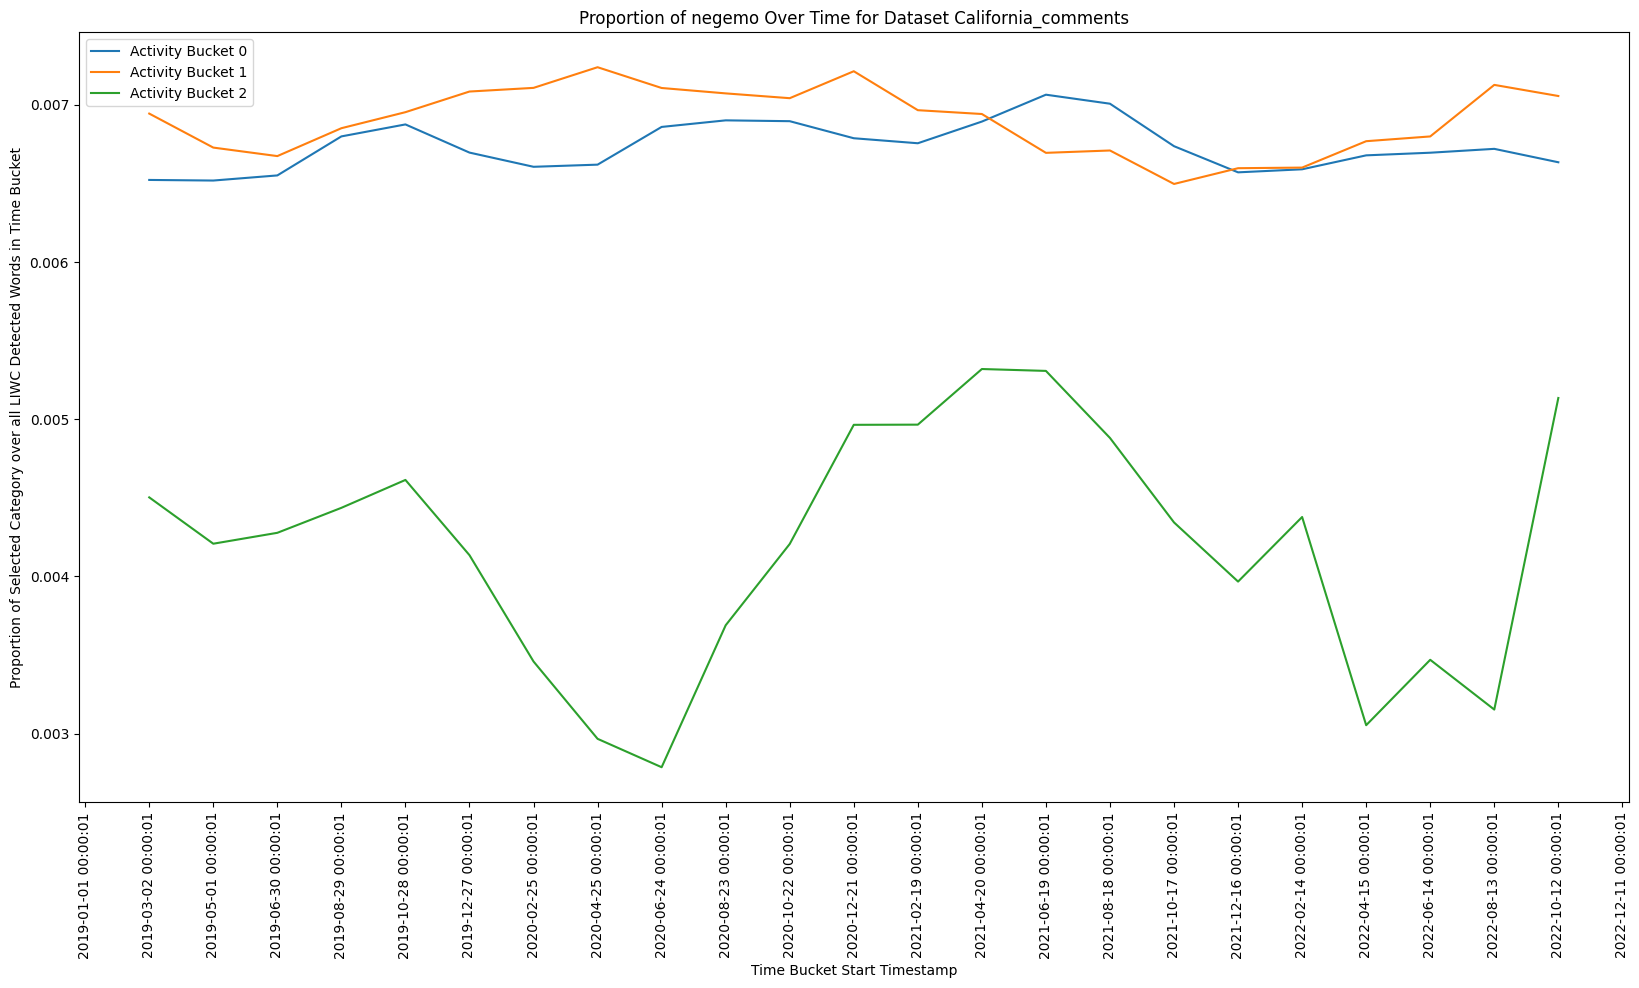

In [94]:
# Read LIWC_category_dict_normalised as a literal string from a file
with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC_normalised.json', 'r') as f:
    # Read the file as a string
    LIWC_category_dict_normalised = f.read()

    # Convert the string to a dictionary
    LIWC_category_dict_normalised = eval(LIWC_category_dict_normalised)

# Import datetime to convert the time_buckets to human readable labels
from datetime import datetime

# Select the LIWC category to graph
category = 'negemo'

# Extract the data from the dictionary
LIWC_by_bucket = LIWC_category_dict_normalised[category]

print(LIWC_by_bucket)

# Set plot size
plt.figure(figsize=(20, 10))

# Graph all activity buckets in different colours
for i in range(3):
    # Create a moving average by taking the average of the current, previous and next time bucket
    moving_average = [(LIWC_by_bucket[i][j] + LIWC_by_bucket[i][j - 1] + LIWC_by_bucket[i][j + 1]) / 3 for j in range(1, len(time_buckets) - 1)]
    # Plot the moving average
    plt.plot(time_buckets[1:-2], moving_average[:-1], label=f'Activity Bucket {i}')


# Give time buckets human readable labels
plt.xticks(time_buckets[:-1], [datetime.utcfromtimestamp(time_bucket).strftime('%Y-%m-%d %H:%M:%S') for time_bucket in time_buckets[:-1]], rotation=90)

# Add labels and title
plt.xlabel('Time Bucket Start Timestamp')
plt.ylabel('Proportion of Selected Category over all LIWC Detected Words in Time Bucket')
plt.title(f'Proportion of {category} Over Time for Dataset {os.path.basename(data_file_path[:-5])}')

# Add a legend
plt.legend()

# Display the graph
plt.show()